In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
retail_df = pd.read_csv("Resources/retail_price_cleaned.csv")

retail_df.head()

,product_id,product_category_name,month_year,qty_sold,total_price,freight_price,unit_price,product_rating,no_customers,month,...,comp1_price,comp1_prod_rating,comp1_freight_price,comp2_price,comp2_prod_rating,comp2_freight_price,comp3_price,comp3_prod_rating,comp3_freight_price,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,4.0,57,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,4.0,61,6,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,4.0,123,7,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,4.0,90,8,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,4.0,54,9,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
retail_df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty_sold',
       'total_price', 'freight_price', 'unit_price', 'product_rating',
       'no_customers', 'month', 'year', 'seasonality', 'volume', 'comp1_price',
       'comp1_prod_rating', 'comp1_freight_price', 'comp2_price',
       'comp2_prod_rating', 'comp2_freight_price', 'comp3_price',
       'comp3_prod_rating', 'comp3_freight_price', 'lag_price'],
      dtype='object')

In [4]:
summary_stats = retail_df.describe()
summary_stats

,qty_sold,total_price,freight_price,unit_price,product_rating,no_customers,month,year,seasonality,volume,comp1_price,comp1_prod_rating,comp1_freight_price,comp2_price,comp2_prod_rating,comp2_freight_price,comp3_price,comp3_prod_rating,comp3_freight_price,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,4.085503,81.028107,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,0.232021,62.055560,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,3.300000,1.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,3.900000,34.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,4.100000,62.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,4.200000,116.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,4.500000,339.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


## PART 1

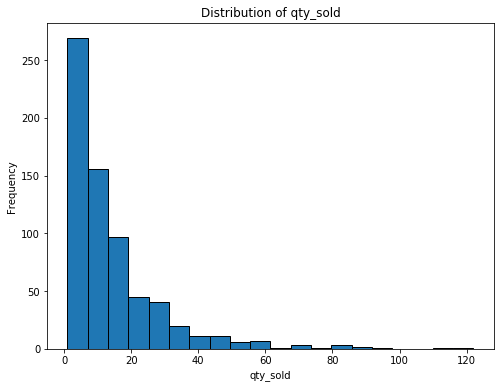

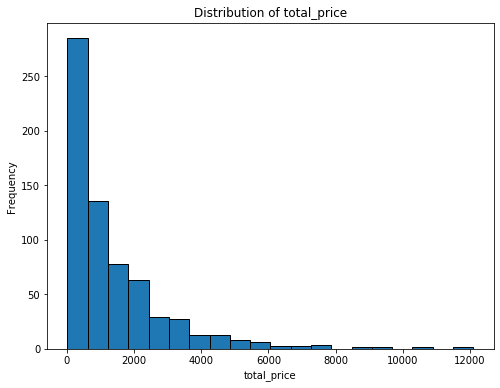

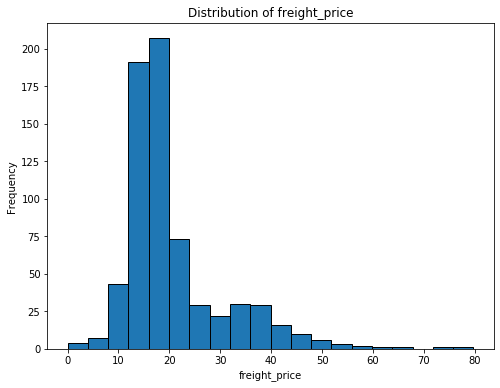

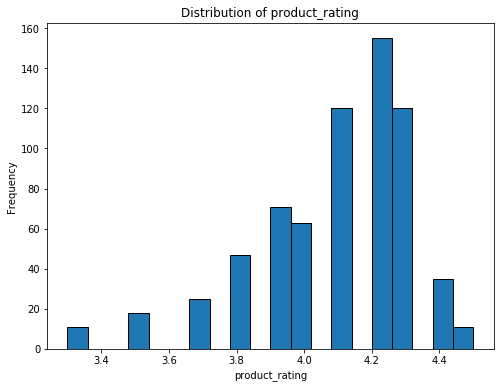

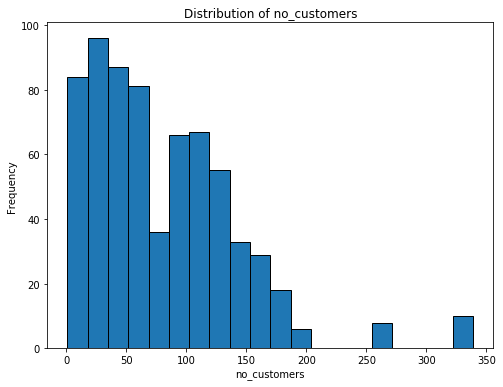

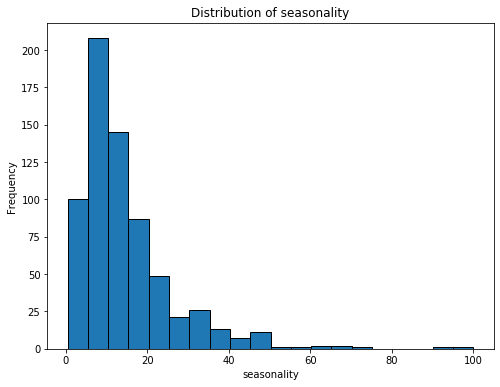

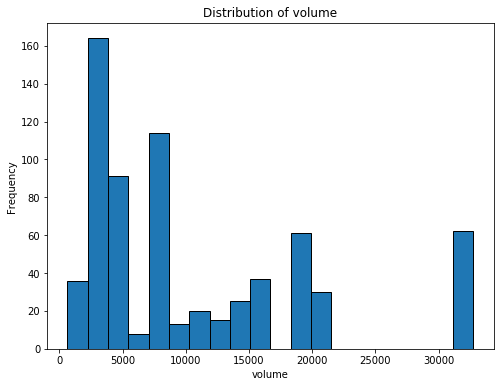

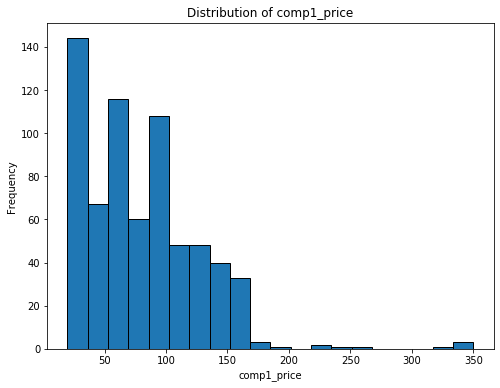

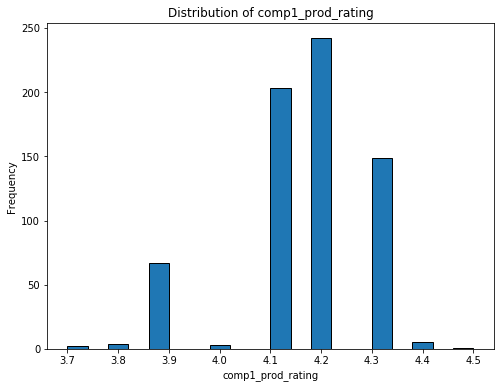

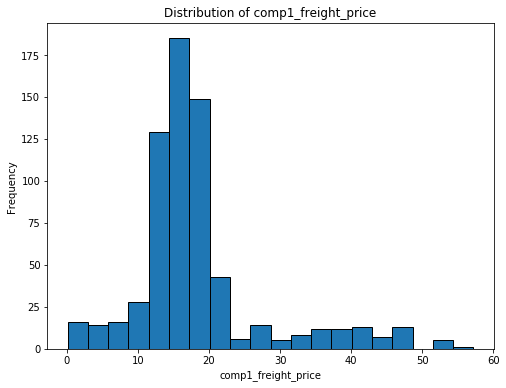

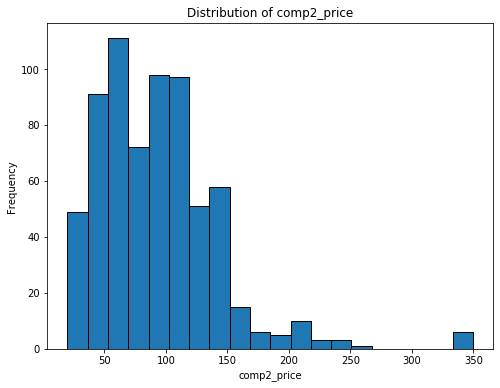

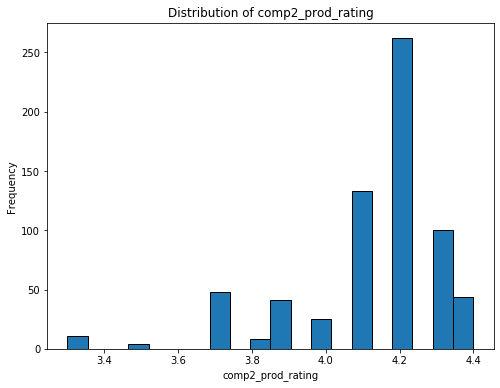

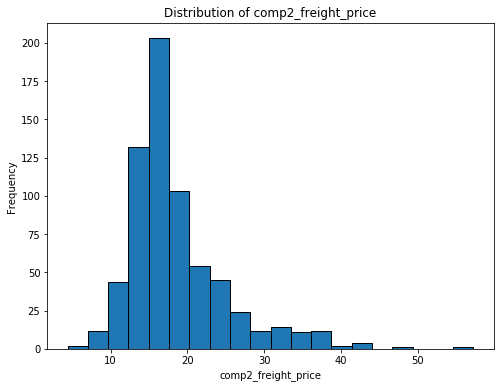

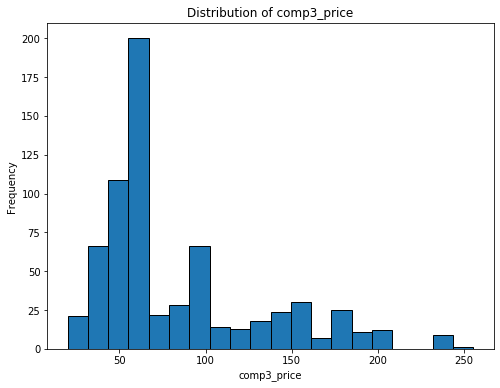

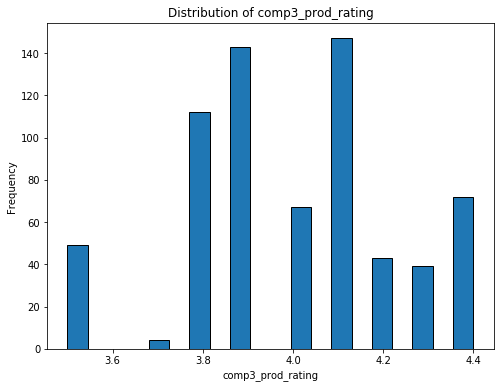

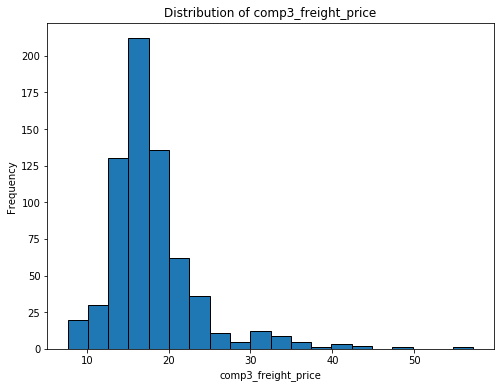

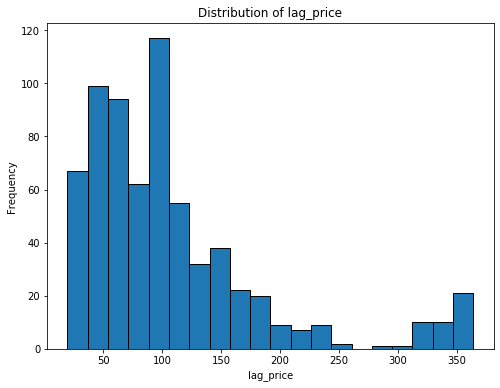

In [5]:
import matplotlib.pyplot as plt

numerical_features = ['qty_sold', 'total_price', 'freight_price', 'product_rating',
                      'no_customers', 'seasonality', 'volume', 'comp1_price',
                      'comp1_prod_rating', 'comp1_freight_price', 'comp2_price',
                      'comp2_prod_rating', 'comp2_freight_price', 'comp3_price',
                      'comp3_prod_rating', 'comp3_freight_price', 'lag_price']

# Create frequency distributions of the above features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(retail_df[feature], bins=20, edgecolor='k')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


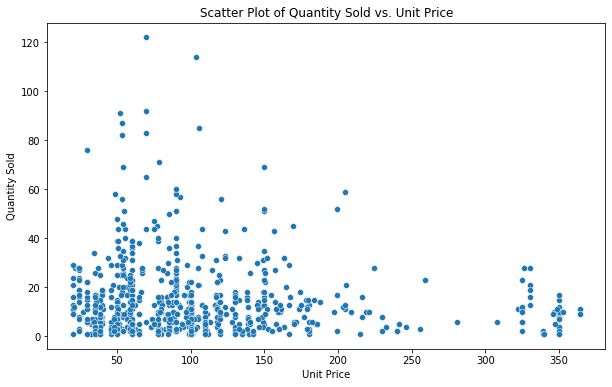

In [6]:
# Scatter plot of qty_sold vs. unit_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=retail_df, x='unit_price', y='qty_sold')
plt.title('Scatter Plot of Quantity Sold vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

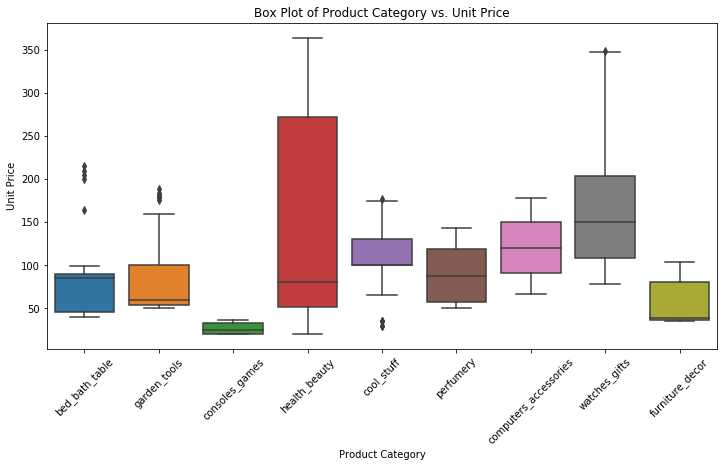

In [7]:
# Box plot of product_category_name vs. unit_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=retail_df, x='product_category_name', y='unit_price')
plt.title('Box Plot of Product Category vs. Unit Price')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.show()

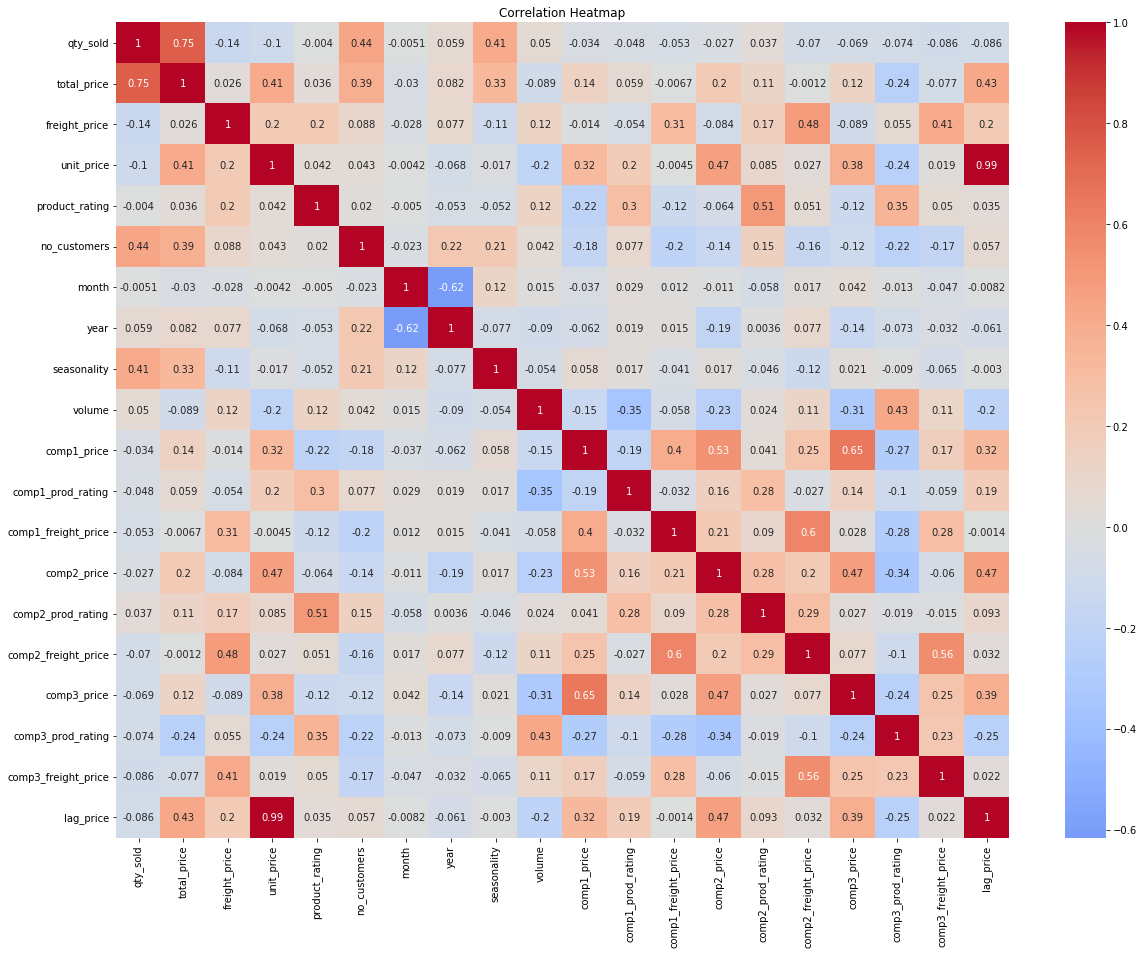

In [8]:
# Correlation_matrix
correlation_matrix = retail_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## PART 2: Explore sales data per product category

In [9]:
# Group quantity sold by product_category_name
sale_vol_by_cat = retail_df.groupby(by=["product_category_name"])["qty_sold"].sum()

sale_vol_by_cat

product_category_name
bed_bath_table           1026
computers_accessories    1167
consoles_games            239
cool_stuff                558
furniture_decor           894
garden_tools             2398
health_beauty            1842
perfumery                 244
watches_gifts            1431
Name: qty_sold, dtype: int64

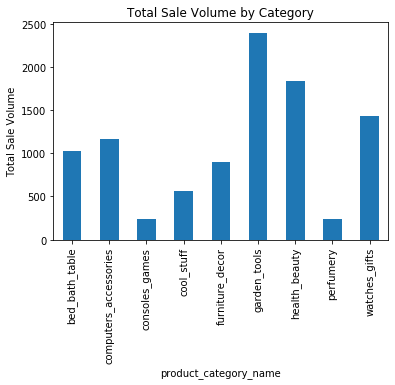

In [10]:
sale_vol_by_cat.plot.bar()
plt.ylabel("Total Sale Volume")
plt.title('Total Sale Volume by Category')
plt.show()

In [11]:
# Group number of customers by product_category_name
no_customer_by_cat = retail_df.groupby(by=["product_category_name"])["no_customers"].sum()

no_customer_by_cat

product_category_name
bed_bath_table            3313
computers_accessories     4807
consoles_games             439
cool_stuff                2168
furniture_decor           2495
garden_tools             17618
health_beauty            13765
perfumery                  427
watches_gifts             9743
Name: no_customers, dtype: int64

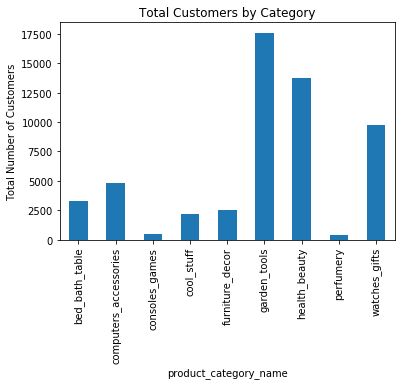

In [12]:
no_customer_by_cat.plot.bar()
plt.ylabel("Total Number of Customers")
plt.title('Total Customers by Category')
plt.show()

In [13]:
# Group number of customers by product_category_name
sale_rev_by_cat = retail_df.groupby(by=["product_category_name"])["total_price"].sum()

sale_rev_by_cat

product_category_name
bed_bath_table            95084.52
computers_accessories    142097.95
consoles_games             5800.70
cool_stuff                57956.30
furniture_decor           56925.16
garden_tools             163582.54
health_beauty            212409.24
perfumery                 20312.52
watches_gifts            207582.17
Name: total_price, dtype: float64

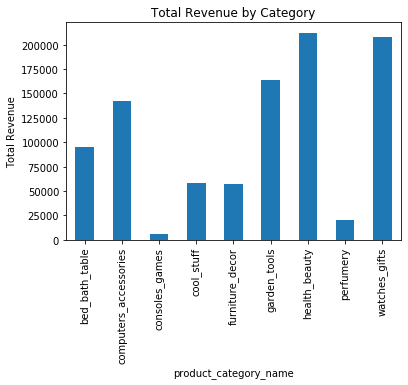

In [14]:
sale_rev_by_cat.plot.bar()
plt.ylabel("Total Revenue")
plt.title('Total Revenue by Category')
plt.show()

In [15]:
sales_data_by_category = pd.DataFrame(retail_df.groupby(["product_category_name"])[["qty_sold", "total_price", "no_customers"]].sum())


In [16]:
# Convert units for graph comparison
sales_data_by_category['total_price'] = sales_data_by_category['total_price'] / 1000
sales_data_by_category['no_customers'] = sales_data_by_category['no_customers'] / 100
sales_data_by_category['qty_sold'] = sales_data_by_category['qty_sold'] / 100

In [17]:
# Rename columns
sales_data_by_category = sales_data_by_category.rename(columns={"qty_sold": "Sales Volume in Hundreds", "total_price": "Revenue in (k)", "no_customers": "Number of Customers in Hundreds"})
sales_data_by_category.head()


,Sales Volume in Hundreds,Revenue in (k),Number of Customers in Hundreds
product_category_name,,,
bed_bath_table,10.26,95.08452,33.13
computers_accessories,11.67,142.09795,48.07
consoles_games,2.39,5.80070,4.39
cool_stuff,5.58,57.95630,21.68
furniture_decor,8.94,56.92516,24.95


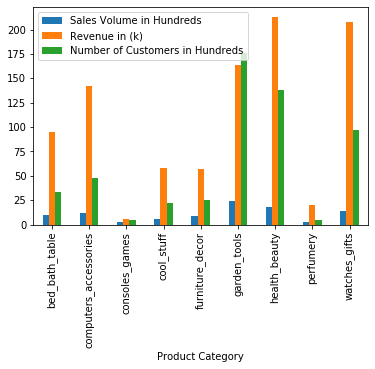

In [18]:
# Plot the sum sales volume, revenue, and number of cusomers
sales_data_by_category.plot.bar()
plt.xlabel("Product Category")
plt.show()

#### Categories with the highest Sales Volume, Revenue, Number of Customers:
- garden_tools
- health_beauty
- watches_gifts

In [19]:
# Find the mean of product_rating by product_category_name
avg_rating_by_cat = retail_df.groupby(by=["product_category_name"])["product_rating"].mean()

avg_rating_by_cat

product_category_name
bed_bath_table           3.908197
computers_accessories    3.985507
consoles_games           4.063636
cool_stuff               4.207018
furniture_decor          3.979167
garden_tools             4.161875
health_beauty            4.145385
perfumery                4.350000
watches_gifts            3.983495
Name: product_rating, dtype: float64

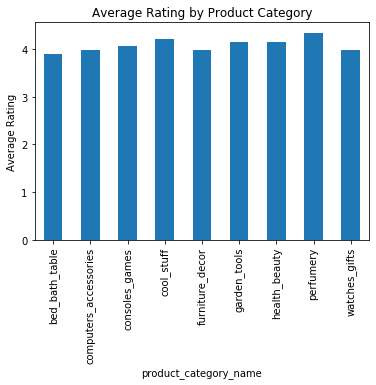

In [20]:
avg_rating_by_cat.plot.bar()
plt.ylabel("Average Rating")
plt.title('Average Rating by Product Category')
plt.show()

## Explore sales data per year

In [21]:
# Create new dataframe "sales_data_by_yr" grouped by year
sales_data_by_yr = pd.DataFrame(retail_df.groupby(["year"])[["qty_sold", "total_price", "no_customers"]].sum())

sales_data_by_yr = sales_data_by_yr.rename(columns={"qty_sold": "Sales Volume", "total_price": "Revenue", "no_customers": "Number of Customers"})

sales_data_by_yr.head()

,Sales Volume,Revenue,Number of Customers
year,,,
2017,4348,409583.28,21441
2018,5451,552167.82,33334


#### Sales volume, revenue and customer numbers were higher in 2018 than 2017
#### Our data is limited to 2 years, hence not much conclusions can be drawn with sales year, but one can look into sales season/month

### Explore relationships

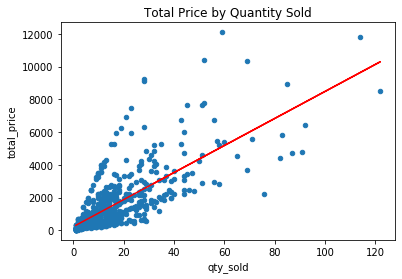

In [22]:
# Compare quantity sold with total price.
retail_df.plot(kind="scatter", x="qty_sold", y="total_price")
plt.title('Total Price by Quantity Sold')

#Create trend line from x and y values
z = np.polyfit(retail_df["qty_sold"], retail_df["total_price"], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(retail_df["qty_sold"], p(retail_df["qty_sold"]), color="red")

plt.show()

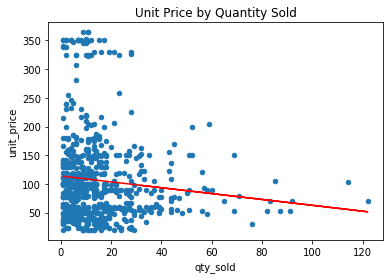

In [23]:
# Compare quantity sold with unit price
retail_df.plot(kind="scatter", x="qty_sold", y="unit_price")
plt.title('Unit Price by Quantity Sold')

#Create trend line from x and y values
z = np.polyfit(retail_df["qty_sold"], retail_df["unit_price"], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(retail_df["qty_sold"], p(retail_df["qty_sold"]), color="red")

plt.show()

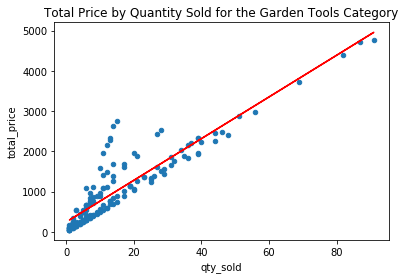

In [24]:
# Test case 1: only using garden_tools category
garden_df = retail_df.loc[retail_df["product_category_name"]=="garden_tools"]

garden_df.plot(kind="scatter", x="qty_sold", y="total_price")
plt.title('Total Price by Quantity Sold for the Garden Tools Category')

#Create trend line from x and y values
z = np.polyfit(garden_df["qty_sold"], garden_df["total_price"], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(garden_df["qty_sold"], p(garden_df["qty_sold"]), color="red")

plt.show()

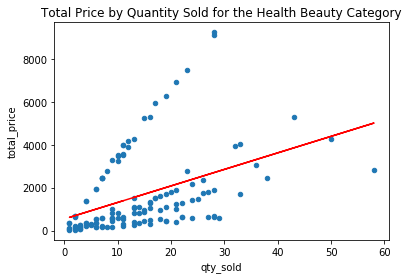

In [25]:
# Test case 2: only using health_beauty category
health_df = retail_df.loc[retail_df["product_category_name"]=="health_beauty"]

health_df.plot(kind="scatter", x="qty_sold", y="total_price")
plt.title('Total Price by Quantity Sold for the Health Beauty Category')

#Create trend line from x and y values
z = np.polyfit(health_df["qty_sold"], health_df["total_price"], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(health_df["qty_sold"], p(health_df["qty_sold"]), color="red")

plt.show()

#### When looking at each product category, there seems to be an linear correlation between sales volume (qty_sold) and product price (total_price)


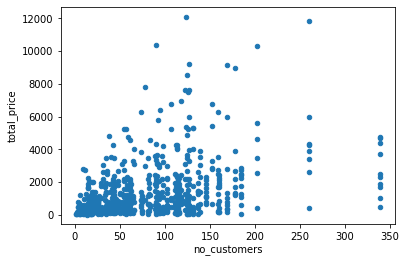

In [26]:
retail_df.plot(kind="scatter", x="no_customers", y="total_price")

plt.show()